# implementing the clustering and classification methods on a variety of datasets, including normal, uniform, skewed, bimodal distributions, and more

## 1.0 Business understanding

### 1.1 Business objective

### 1.2 Situational assessment

## 2.0 Data Understanding

### 2.1 Prelimary data analysis

#### 2.1.1 Data mining goals

#### 2.1.2 Import libraries

In [267]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import numpy as np
import seaborn as sns
import itertools
import warnings

In [246]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import silhouette_score as ss
from sklearn.decomposition import PCA
from IPython.display import clear_output

#### 2.1.3 Suppress warnings

In [274]:
pio.renderers.default = 'colab'  # 'notebook' or 'colab' if using Google Colab

In [106]:
warnings.filterwarnings('ignore')

#### 2.1.4 Clustering visualization function

In [107]:
def plot_clustering(data, kmeans_labels, dbscan_labels, hierarchical_labels, title):
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.scatter(data, np.zeros_like(data), c=kmeans_labels)
    plt.title('K-Means Clustering')
    plt.subplot(1, 3, 2)
    plt.scatter(data, np.zeros_like(data), c=dbscan_labels)
    plt.title('DBSCAN Clustering')
    plt.subplot(1, 3, 3)
    plt.scatter(data, np.zeros_like(data), c=hierarchical_labels)
    plt.title('Hierarchical Clustering')
    plt.suptitle(title)
    plt.show()

#### 2.1.5 Data ingestion

In [108]:
var_clusters = 5
var_eps = 0.5
var_samples = 10
var_linkage = 'complete'

##### 2.1.5.1 Normal distribution

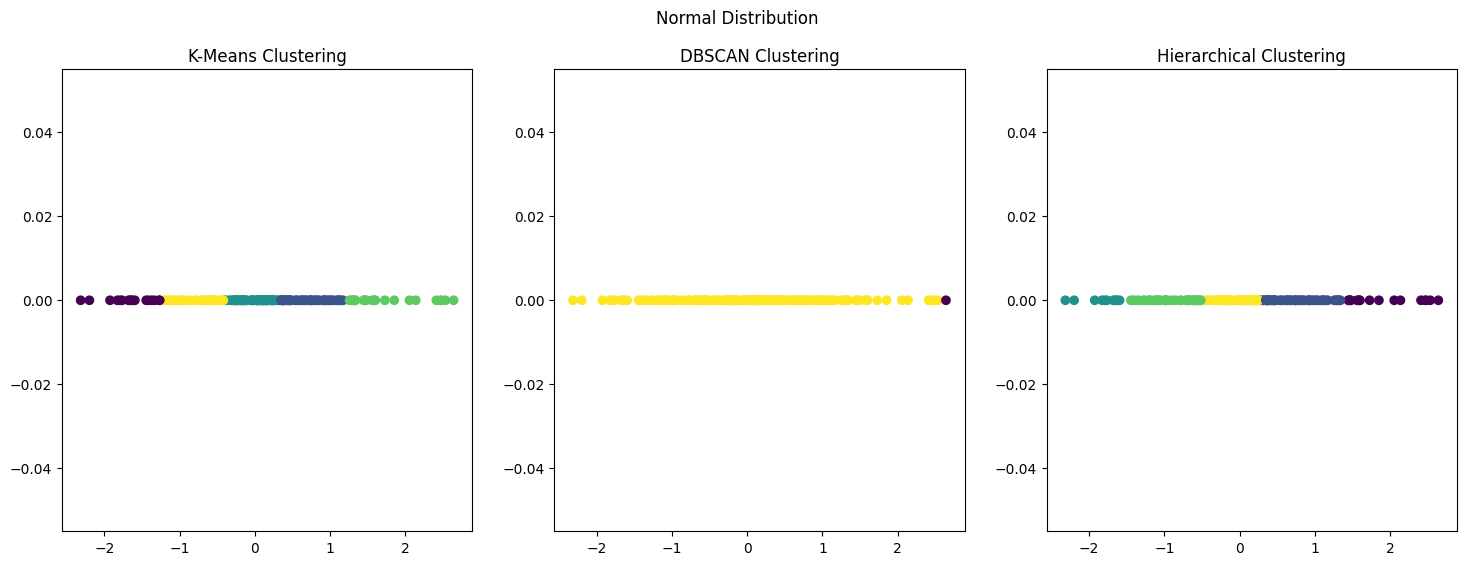

In [109]:
data_normal = np.random.randn(200, 1)
kmeans_labels_normal = KMeans(n_clusters=var_clusters, random_state=42).fit_predict(data_normal)
dbscan_labels_normal = DBSCAN(eps=var_eps, min_samples=var_samples).fit_predict(data_normal)
hierarchical_labels_normal = AgglomerativeClustering(n_clusters=var_clusters, linkage=var_linkage).fit_predict(data_normal)
plot_clustering(data_normal, kmeans_labels_normal, dbscan_labels_normal, hierarchical_labels_normal, 'Normal Distribution')

##### 2.1.5.2 Uniform distribution

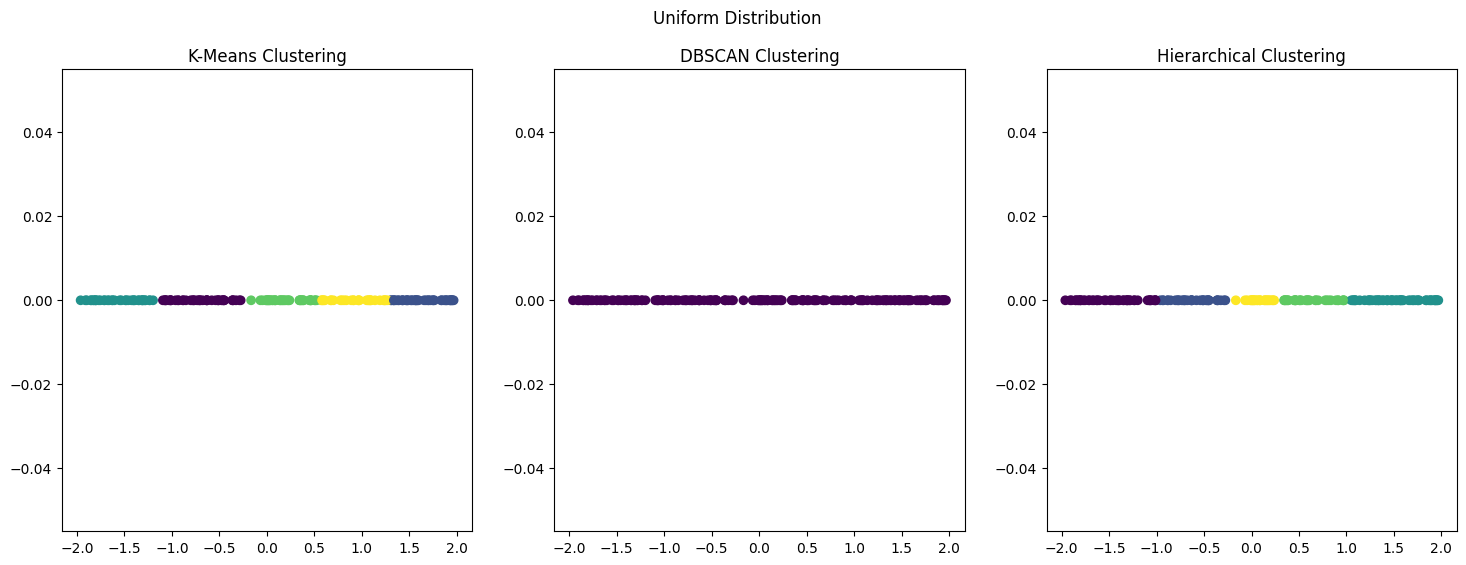

In [110]:
data_uniform = np.random.uniform(-2, 2, (200, 1))
kmeans_labels_uniform = KMeans(n_clusters=var_clusters, random_state=42).fit_predict(data_uniform)
dbscan_labels_uniform = DBSCAN(eps=var_eps, min_samples=var_samples).fit_predict(data_uniform)
hierarchical_labels_uniform = AgglomerativeClustering(n_clusters=var_clusters, linkage=var_linkage).fit_predict(data_uniform)
plot_clustering(data_uniform, kmeans_labels_uniform, dbscan_labels_uniform, hierarchical_labels_uniform, 'Uniform Distribution')

##### 2.1.5.3 Skewed distribution

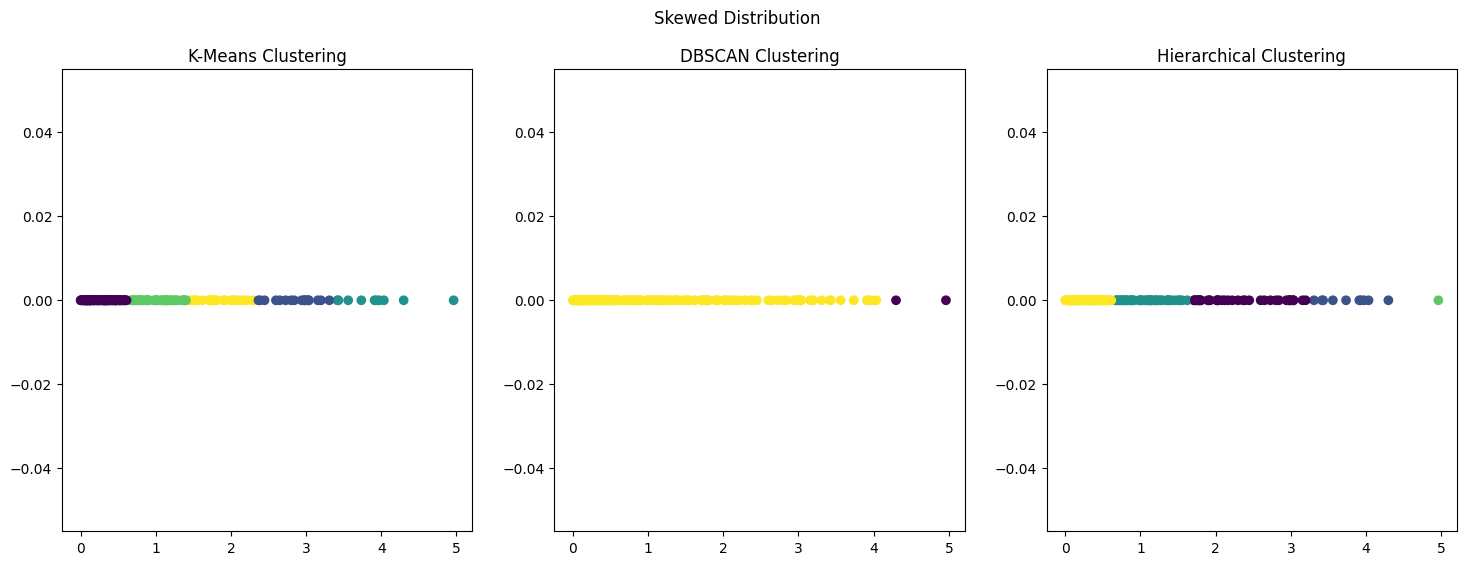

In [111]:
data_skewed = np.random.exponential(scale=1, size=(200, 1))
kmeans_labels_skewed = KMeans(n_clusters=var_clusters, random_state=42).fit_predict(data_skewed)
dbscan_labels_skewed = DBSCAN(eps=var_eps, min_samples=var_samples).fit_predict(data_skewed)
hierarchical_labels_skewed = AgglomerativeClustering(n_clusters=var_clusters, linkage=var_linkage).fit_predict(data_skewed)
plot_clustering(data_skewed, kmeans_labels_skewed, dbscan_labels_skewed, hierarchical_labels_skewed, 'Skewed Distribution')

##### 2.1.5.4 Bimodal distribution

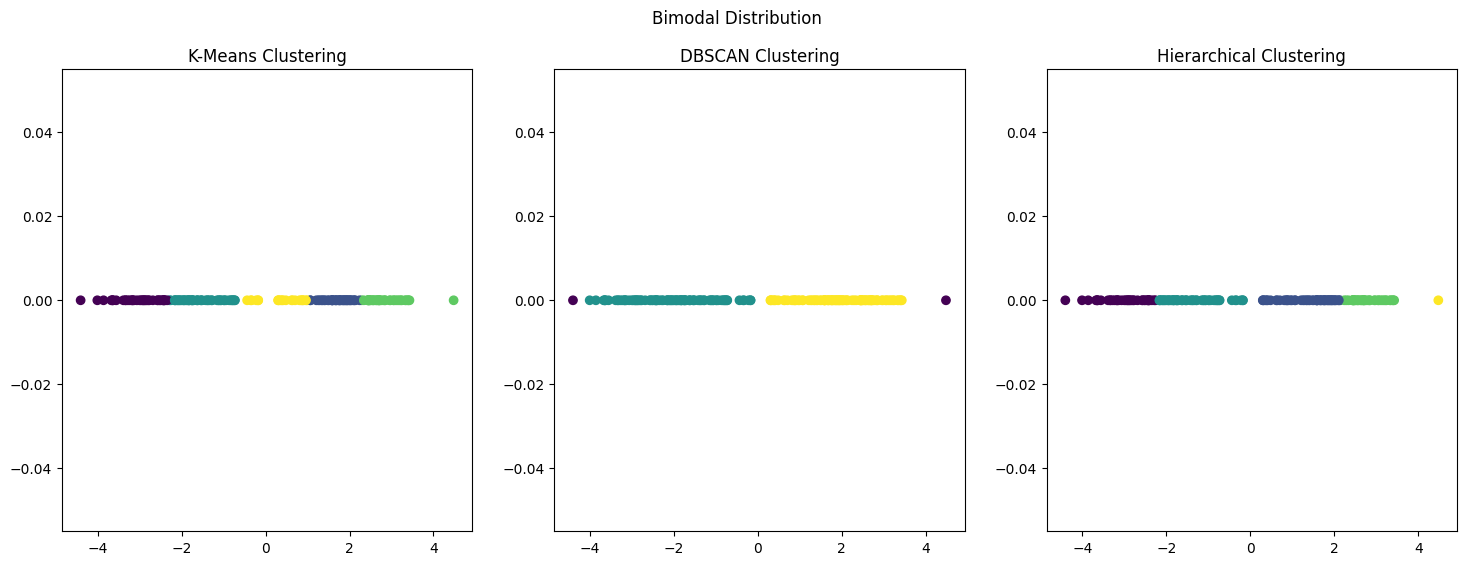

In [112]:
data_bimodal = np.concatenate([np.random.randn(100, 1) - 2, np.random.randn(100, 1) + 2])
kmeans_labels_bimodal = KMeans(n_clusters=var_clusters, random_state=42).fit_predict(data_bimodal)
dbscan_labels_bimodal = DBSCAN(eps=var_eps, min_samples=var_samples).fit_predict(data_bimodal)
hierarchical_labels_bimodal = AgglomerativeClustering(n_clusters=var_clusters, linkage=var_linkage).fit_predict(data_bimodal)
plot_clustering(data_bimodal, kmeans_labels_bimodal, dbscan_labels_bimodal, hierarchical_labels_bimodal, 'Bimodal Distribution')

##### 2.1.5.5 Data with outliers

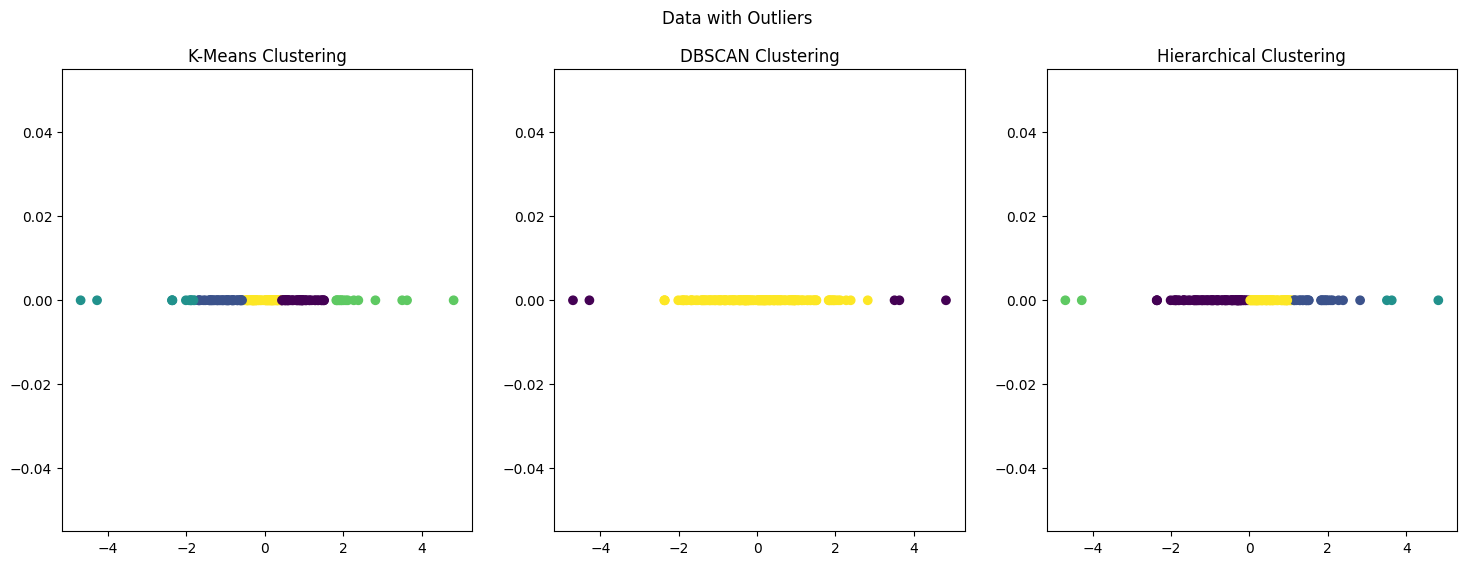

In [113]:
data_outliers = np.concatenate([np.random.randn(190, 1), np.random.uniform(-5, 5, (10, 1))])
kmeans_labels_outliers = KMeans(n_clusters=var_clusters, random_state=42).fit_predict(data_outliers)
dbscan_labels_outliers = DBSCAN(eps=var_eps, min_samples=var_samples).fit_predict(data_outliers)
hierarchical_labels_outliers = AgglomerativeClustering(n_clusters=var_clusters, linkage=var_linkage).fit_predict(data_outliers)
plot_clustering(data_outliers, kmeans_labels_outliers, dbscan_labels_outliers, hierarchical_labels_outliers, 'Data with Outliers')

##### 2.1.5.6 Data with outliers

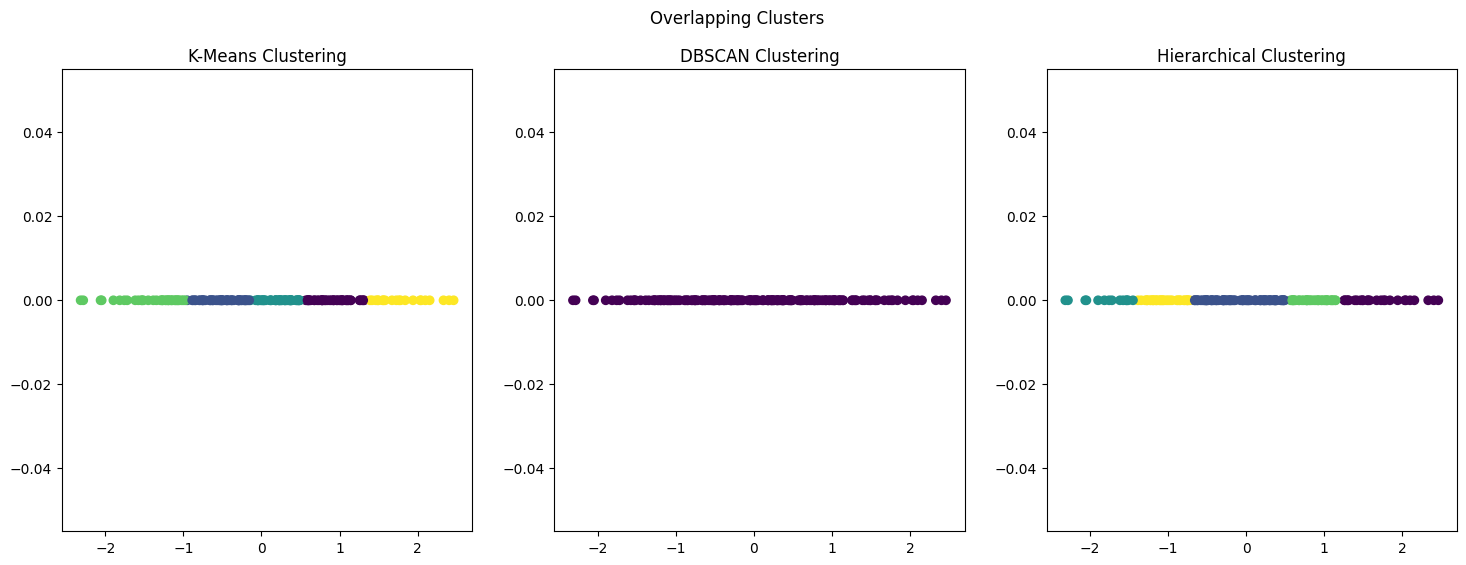

In [114]:
data_overlap = np.concatenate([np.random.randn(100, 1), np.random.randn(100, 1)])
kmeans_labels_overlap = KMeans(n_clusters=var_clusters, random_state=42).fit_predict(data_overlap)
dbscan_labels_overlap = DBSCAN(eps=var_eps, min_samples=var_samples).fit_predict(data_overlap)
hierarchical_labels_overlap = AgglomerativeClustering(n_clusters=var_clusters, linkage=var_linkage).fit_predict(data_overlap)
plot_clustering(data_overlap, kmeans_labels_overlap, dbscan_labels_overlap, hierarchical_labels_overlap, 'Overlapping Clusters')

#### 2.1.6 Classification on skewed data

In [115]:
X_train, X_test, y_train, y_test = train_test_split(data_skewed, np.array([1 if i > 1 else 0 for i in data_skewed]), test_size=0.2, random_state=42)

In [116]:
np.median(X_train)

np.float64(0.754798127309408)

##### 2.1.6.1 SVM Classifier

In [117]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



##### 2.1.6.2 Decision tree classifier

In [118]:
tree_model = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, tree_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#### 2.1.7 K-means from scratch

In [124]:
# Import dataset
#create 2-dimensional dataFrames from a imported data.
#Choose the local file (baseball.csv).
#NOTE: YOU WILL NEED TO ALLOW THIRD-PARTY COOKIES FROM THIS SITE colab.research.google.com
from google.colab import files
uploaded = files.upload()

Saving Fifa 23 Players Data.csv to Fifa 23 Players Data.csv


In [127]:
file_name = "Fifa 23 Players Data.csv"

In [128]:
# Load dataset
wc=pd.read_csv(file_name)
wc.head(5)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [130]:
wc.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [227]:
features = ['Overall', 'Potential', 'Value(in Euro)', 'Wage(in Euro)', 'Age']

In [132]:
wc = wc.dropna(subset=features)

In [134]:
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [136]:
data = wc[features].copy()

In [137]:
data

,Overall,Potential,Value(in Euro),Wage(in Euro),Age
0,91,91,54000000,195000,35
1,91,91,64000000,450000,34
2,91,91,84000000,420000,33
3,91,91,107500000,350000,31
4,91,95,190500000,230000,23
...,...,...,...,...,...
18534,47,56,110000,500,21
18535,47,57,90000,500,17
18536,47,67,130000,500,18
18537,47,61,100000,500,17


##### 2.1.7.1 Scale the data from 1 to 10 using min max scaling

In [138]:
data = (data - data.min()) / (data.max() - data.min()) * 9 + 1

In [139]:
data.describe()

,Overall,Potential,Value(in Euro),Wage(in Euro),Age
count,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,4.856099,5.407447,1.135849,1.176491,3.970132
std,1.388527,1.185868,0.360715,0.389211,1.516552
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.068182,4.638298,1.022441,1.020000,2.607143
50%,4.886364,5.404255,1.047244,1.060000,3.892857
75%,5.704545,6.170213,1.094488,1.160000,5.178571
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [140]:
data.head()

,Overall,Potential,Value(in Euro),Wage(in Euro),Age
0,10.0,9.234043,3.551181,4.9,7.107143
1,10.0,9.234043,4.023622,10.0,6.785714
2,10.0,9.234043,4.968504,9.4,6.464286
3,10.0,9.234043,6.078740,8.0,5.821429
4,10.0,10.000000,10.000000,5.6,3.250000


##### 2.1.7.2 Initialize random centroids

In [144]:
num_clusters = 5

In [145]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [146]:
centroids = random_centroids(data, num_clusters)

In [147]:
centroids

,0,1,2,3,4
Overall,4.886364,4.477273,2.840909,3.659091,4.477273
Potential,4.446809,3.680851,2.340426,4.446809,6.936170
Value(in Euro),1.075591,1.018898,1.051969,1.042520,1.009921
Wage(in Euro),1.800000,1.010000,1.010000,1.300000,1.040000
Age,5.178571,2.285714,2.607143,4.535714,7.107143


##### 2.1.7.3 Label each data point

###### 2.1.7.3.1 Calculate distance to centroids

In [151]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

###### 2.1.7.3.2 Calculate cluster assignments

In [152]:
labels = get_labels(data, centroids)

In [153]:
labels

,0
0,4
1,4
2,4
3,4
4,0
...,...
18534,2
18535,2
18536,2
18537,2


In [154]:
labels.value_counts()

,count
0,8026
1,5055
3,3575
4,995
2,888


##### 2.1.7.4 Update centroids

###### 2.1.7.4.1 Identify cluster centers using geometric mean

In [157]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

##### 2.1.7.5 Repeat steps 3 and 4 until centroids stop moving

###### 2.1.7.5.1 Two dimensional visualization

In [176]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.figure(figsize=(9, 6))
    plt.title(f'Iteration {iteration}')

    # Plot each cluster separately
    unique_labels = np.unique(labels)
    for cluster_id in unique_labels:
        cluster_points = data_2d[labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')

    # Plot centroids
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1],
                marker='*', s=200, c='#050505', label='Centroids')

    plt.legend()
    plt.show()

In [173]:
'''
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.figure(figsize=(12, 8))
    plt.title(f'Iteration {iteration}')
    plt.scatter(x= data_2d[:, 0], y = data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1], marker='*', s=200, c='#050505')
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Centroids'])
    plt.show()
'''

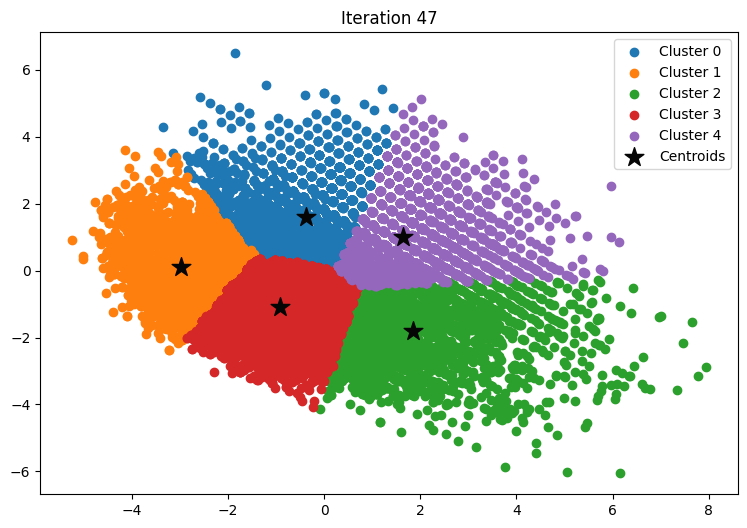

In [177]:
max_iterations = 100
k = 5

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

###### 2.1.7.5.2 Final centroid values

In [178]:
centroids

,0,1,2,3,4
Overall,4.272510,2.584727,6.778756,4.466241,5.785280
Potential,4.092362,4.386689,7.048820,5.877653,5.344496
Value(in Euro),1.026611,1.013631,1.517147,1.061654,1.081300
Wage(in Euro),1.046286,1.022135,1.579099,1.063448,1.181440
Age,4.795950,2.314843,3.720330,2.683784,5.659319


###### 2.1.7.5.3 Cluster 4: Highly paid star players

In [179]:
wc[labels == 2][["Known As"] + features]

,Known As,Overall,Potential,Value(in Euro),Wage(in Euro),Age
0,L. Messi,91,91,54000000,195000,35
1,K. Benzema,91,91,64000000,450000,34
2,R. Lewandowski,91,91,84000000,420000,33
3,K. De Bruyne,91,91,107500000,350000,31
4,K. Mbappé,91,95,190500000,230000,23
...,...,...,...,...,...,...
5917,F. Becker,69,80,3100000,13000,22
5959,Ž. Frelih,69,77,2700000,4000,24
5968,Adrián Bernabé,69,82,3400000,2000,21
5981,A. Diallo,69,85,3600000,23000,19


###### 2.1.7.5.4 Cluster 1: Young high potential players

In [180]:
wc[labels == 3][["Known As"] + features]

,Known As,Overall,Potential,Value(in Euro),Wage(in Euro),Age
3024,Vanderleiton,72,72,2400000,15000,22
3042,Kainho Selva,72,72,2400000,8000,22
3111,Teixe Gaúcho,72,72,2400000,10000,22
3192,Leordinho Paes,72,72,2800000,16000,22
3212,Sebas Couteira,72,72,2800000,10000,22
...,...,...,...,...,...,...
17191,A. Nuñez,56,78,425000,500,17
17209,R. Norheim,56,76,375000,500,17
17226,O. Óskarsson,55,77,400000,700,17
17266,M. Riisnæs,55,77,400000,500,17


#### 2.1.8 Gold prices

In [119]:
# Import dataset
#create 2-dimensional dataFrames from a imported data.
#Choose the local file (baseball.csv).
#NOTE: YOU WILL NEED TO ALLOW THIRD-PARTY COOKIES FROM THIS SITE colab.research.google.com
from google.colab import files
uploaded = files.upload()

Saving gold_price_data.csv to gold_price_data (2).csv


In [120]:
file_name = "gold_price_data.csv"

In [121]:
# Load dataset
df=pd.read_csv(file_name)
df.head(5)

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4


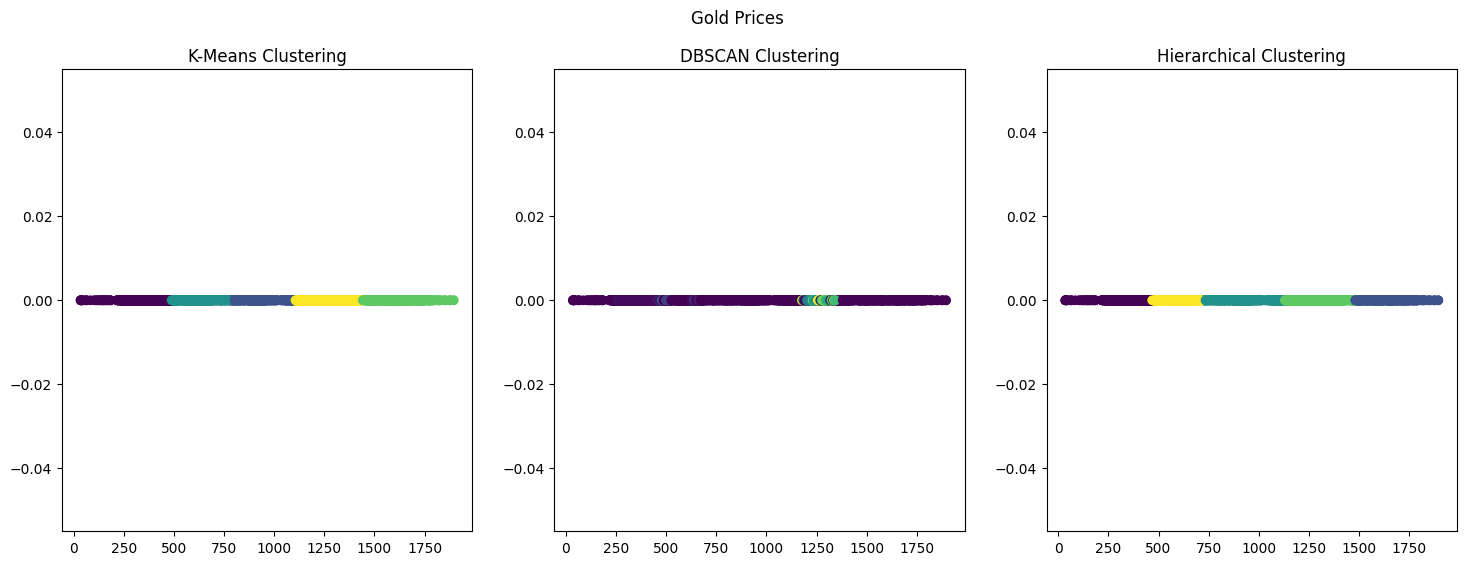

In [123]:
feature_df = df.drop('Date', axis=1)
kmeans_labels_outliers = KMeans(n_clusters=var_clusters, random_state=42).fit_predict(feature_df)
dbscan_labels_outliers = DBSCAN(eps=var_eps, min_samples=var_samples).fit_predict(feature_df)
hierarchical_labels_outliers = AgglomerativeClustering(n_clusters=var_clusters, linkage=var_linkage).fit_predict(feature_df)
plot_clustering(feature_df, kmeans_labels_outliers, dbscan_labels_outliers, hierarchical_labels_outliers, 'Gold Prices')

#### 2.1.9 DBSCAN using housing data

In [191]:
hd = pd.read_csv('sample_data/california_housing_train.csv')
hd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [192]:
lat_long = hd[['latitude', 'longitude']]
lat, lon = hd.latitude, hd.longitude

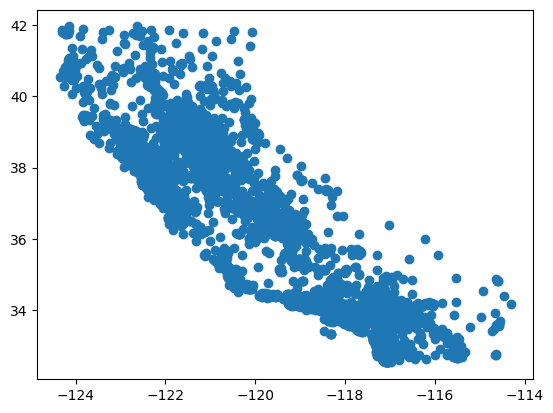

In [194]:
plt.scatter(lon, lat)
plt.show()

In [195]:
x = lat_long.to_numpy()

In [208]:
dbscan_cluster_model = DBSCAN(eps=0.2, min_samples=15).fit(x)
dbscan_cluster_model

DBSCAN(eps=0.2, min_samples=15)

In [209]:
hd['cluster'] = dbscan_cluster_model.labels_
hd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,-1
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,-1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,-1
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,-1
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,-1
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,9
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,9
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,-1
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,-1


In [210]:
hd['cluster'].value_counts()

,count
cluster,
2,9065
4,6999
-1,401
7,219
9,95
0,84
6,77
3,21
5,18


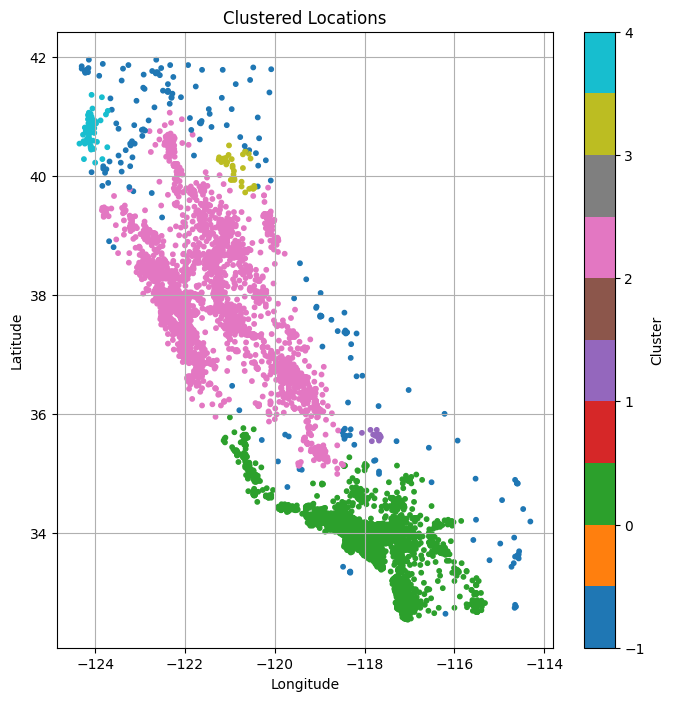

In [280]:
plt.figure(figsize=(8, 8))  # size in inches
scatter = plt.scatter(x = lon, y = lat, c=hd["cluster"], s=10, cmap="tab10") #, alpha=0.7

plt.title("Clustered Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

In [278]:
fig = px.scatter(x = lon, y = lat, color=hd["cluster"])
fig.update_layout(width=800, height=800)
fig.show()

silhoutte score

In [212]:
ss(x, hd['cluster'])

np.float64(0.25721908993836395)

Optimize grid search

In [213]:
epsilons  = np.linspace(0.01, 1, num = 15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [214]:
min_samples = np.arange(2, 20, step = 3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [218]:
combinations = list (itertools.product(epsilons, min_samples))
N = len(combinations)
N

90

In [219]:
def get_scores_and_labels(combinations, x):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(x)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1

    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue

    scores.append(ss(x, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_score = scores[best_index]
  best_labels = all_labels_list[best_index]

  return {'best_epsilon': best_parameters[0], 'best_min_samples': best_parameters[1], 'best_score': best_score, 'best_labels': best_labels}

best_dict = get_scores_and_labels(combinations, x)

Combination (np.float64(0.01), np.int64(2)) on iteration 1 of 90 has 2170 clusters. Moving on
Combination (np.float64(0.01), np.int64(5)) on iteration 2 of 90 has 945 clusters. Moving on
Combination (np.float64(0.01), np.int64(8)) on iteration 3 of 90 has 394 clusters. Moving on
Combination (np.float64(0.01), np.int64(11)) on iteration 4 of 90 has 179 clusters. Moving on
Combination (np.float64(0.01), np.int64(14)) on iteration 5 of 90 has 75 clusters. Moving on
Index: 5, Score: -0.7351371201118361, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 36
Combination (np.float64(0.08071428571428571), np.int64(2)) on iteration 7 of 90 has 130 clusters. Moving on
Combination (np.float64(0.08071428571428571), np.int64(5)) on iteration 8 of 90 has 70 clusters. Moving on
Combination (np.float64(0.08071428571428571), np.int64(8)) on iteration 9 of 90 has 54 clusters. Moving on
Index: 9, Score: 0.2241184716489065, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 50
Index: 10, Score: 0.23025110810727797,

In [220]:
best_dict

{'best_epsilon': np.float64(0.29285714285714287),
 'best_min_samples': np.int64(14),
 'best_score': np.float64(0.4066290757338104),
 'best_labels': array([-1, -1, -1, ..., -1, -1,  4])}

In [221]:
hd['cluster'] = best_dict['best_labels']

In [222]:
hd['cluster'].value_counts()

,count
cluster,
0,9417
2,7221
-1,202
4,103
3,35
1,22


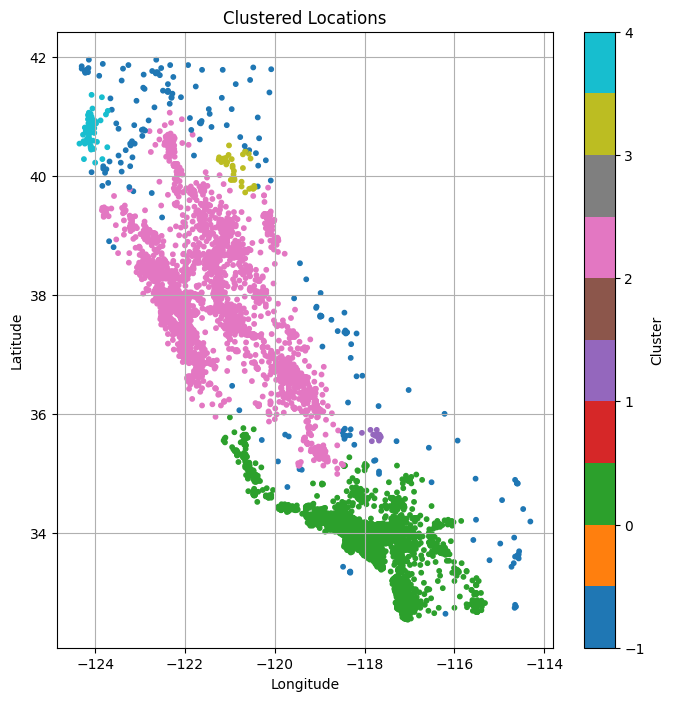

In [281]:
plt.figure(figsize=(8, 8))  # size in inches
scatter = plt.scatter(x = lon, y = lat, c=hd["cluster"], s=10, cmap="tab10") #, alpha=0.7

plt.title("Clustered Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

In [223]:
fig = px.scatter(x = lon, y = lat, color=hd["cluster"])
fig.update_layout(width=800, height=800)
fig.show()

#### 2.1.10 DBSCAN using california housing data

#### 2.1.11 K-means using california housing data

In [226]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
 9   cluster             17000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.3 MB


In [224]:
hd.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'cluster'],
      dtype='object')

In [228]:
features2 = ['housing_median_age', 'total_rooms', 'total_bedrooms',
            'population', 'households', 'median_income','median_house_value']

In [230]:
data2 = hd[features2].copy()

In [231]:
data2

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...
16995,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


##### 2.1.11.1 Scale the data from 1 to 10 using min max scaling

In [232]:
data2 = (data2 - data2.min()) / (data2.max() - data2.min()) * 9 + 1

In [233]:
data.describe()

,Overall,Potential,Value(in Euro),Wage(in Euro),Age
count,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,4.856099,5.407447,1.135849,1.176491,3.970132
std,1.388527,1.185868,0.360715,0.389211,1.516552
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.068182,4.638298,1.022441,1.020000,2.607143
50%,4.886364,5.404255,1.047244,1.060000,3.892857
75%,5.704545,6.170213,1.094488,1.160000,5.178571
max,10.000000,10.000000,10.000000,10.000000,10.000000


##### 2.1.11.2 Initialize random centroids

In [234]:
num_clusters2 = 5

In [235]:
def random_centroids2(data, k):
    centroids2 = []
    for i in range(k):
        centroid2 = data.apply(lambda x: float(x.sample()))
        centroids2.append(centroid2)
    return pd.concat(centroids2, axis=1)

In [236]:
centroids2 = random_centroids2(data2, num_clusters2)

In [237]:
centroids2

,0,1,2,3,4
housing_median_age,6.294118,6.117647,1.705882,5.588235,2.588235
total_rooms,1.594069,1.500356,1.459075,1.962989,1.547094
total_bedrooms,1.592179,1.515363,1.652235,1.452514,2.096369
population,1.146809,1.023711,1.227024,1.454805,1.034810
households,1.170202,1.112481,1.236803,1.716330,1.914652
median_income,3.245748,5.608495,2.629350,4.445835,1.517896
median_house_value,3.965367,2.809289,4.032171,6.294224,4.303098


##### 2.1.11.3 Label each data point

###### 2.1.11.3.1 Calculate distance to centroids

In [242]:
def get_labels2(data, centroids):
    distances2 = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances2.idxmin(axis=1)

###### 2.1.11.3.2 Calculate cluster assignments

In [243]:
labels2 = get_labels2(data2, centroids2)

In [244]:
labels2

,0
0,4
1,4
2,4
3,2
4,4
...,...
16995,0
16996,0
16997,4
16998,4


In [245]:
labels2.value_counts()

,count
0,8713
3,4395
4,2201
2,1666
1,25


##### 2.1.11.4 Update centroids

###### 2.1.11.4.1 Identify cluster centers using geometric mean

In [247]:
def new_centroids2(data, labels, k):
    return data2.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

##### 2.1.11.5 Repeat steps 3 and 4 until centroids stop moving

###### 2.1.11.5.1 Two dimensional visualization

In [248]:
def plot_clusters2(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data2_2d = pca.fit_transform(data)
    centroids2_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.figure(figsize=(9, 6))
    plt.title(f'Iteration {iteration}')

    # Plot each cluster separately
    unique_labels = np.unique(labels)
    for cluster_id in unique_labels:
        cluster_points = data2_2d[labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')

    # Plot centroids
    plt.scatter(centroids2_2d[:, 0], centroids2_2d[:, 1],
                marker='*', s=200, c='#050505', label='Centroids')

    plt.legend()
    plt.show()

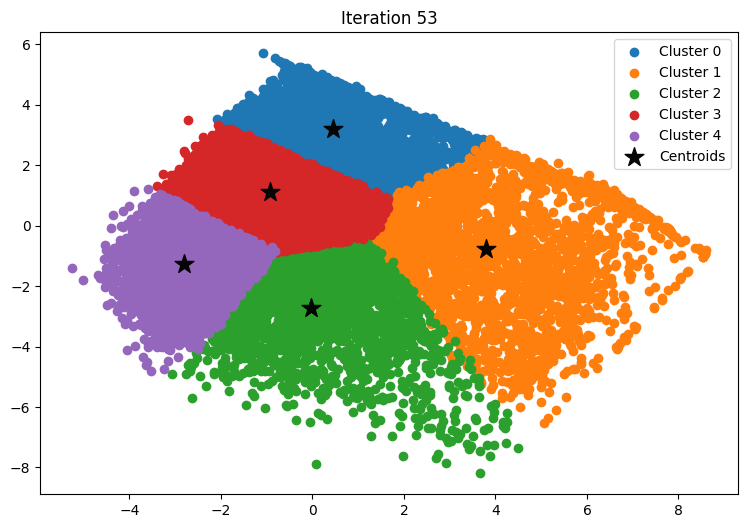

In [249]:
max_iterations2 = 100
k2 = 5

centroids2 = random_centroids(data2, k2)
old_centroids2 = pd.DataFrame()
iteration = 1

while iteration < max_iterations2 and not centroids2.equals(old_centroids2):
    old_centroids2 = centroids2
    labels2 = get_labels(data2, centroids2)
    centroids2 = new_centroids2(data2, labels2, k2)
    plot_clusters2(data2, labels2, centroids2, iteration)
    iteration += 1

###### 2.1.11.5.2 Final centroid values

In [250]:
centroids2

,0,1,2,3,4
housing_median_age,8.779842,7.143508,3.584745,6.294476,3.291798
total_rooms,1.373969,1.576739,1.854167,1.469101,1.682693
total_bedrooms,1.500380,1.624482,1.906010,1.599000,1.843219
population,1.253653,1.267054,1.440692,1.322992,1.402325
households,1.501258,1.629449,1.899684,1.598083,1.801902
median_income,2.370551,4.084065,3.855895,2.568279,2.545755
median_house_value,3.475111,8.104300,5.776325,3.318408,2.961232


###### 2.1.7.5.3 Cluster 4: High income expensive homes

In [263]:
hd['labels'] = labels2

In [264]:
hd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster,labels
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,-1,4
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,-1,4
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,-1,4
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,-1,4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,-1,4
...,...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,4,0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,4,3
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,-1,4
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,-1,4


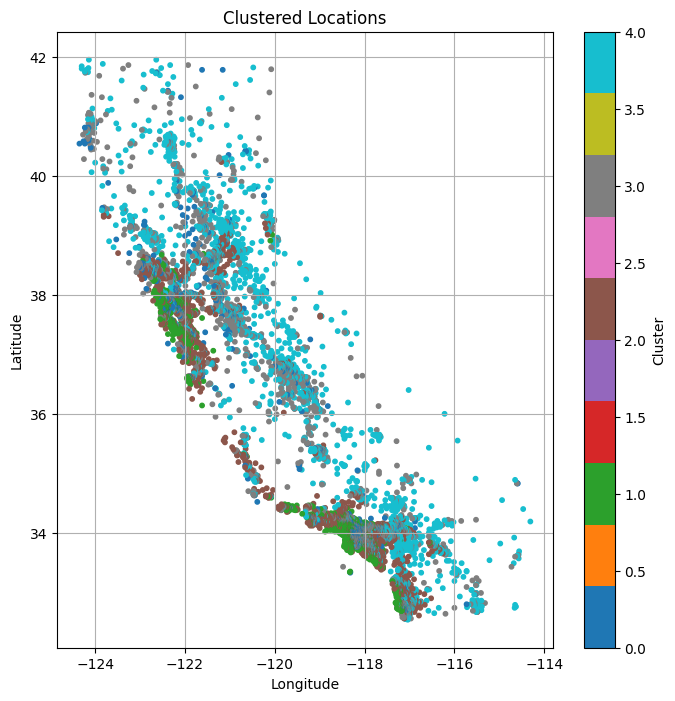

In [277]:
plt.figure(figsize=(8, 8))  # size in inches
scatter = plt.scatter(hd["longitude"], hd["latitude"], c=hd["labels"], s=10, cmap="tab10") #, alpha=0.7

plt.title("Clustered Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

In [275]:
fig = px.scatter(x = hd["longitude"], y = hd["latitude"], color=hd["labels"])
fig.update_layout(width=800, height=800)
fig.show()

End of code.